<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

%matplotlib inline

In [8]:
sac = pd.read_csv('./data/sacramento_real_estate_transactions.csv')

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [9]:
# A:
sac.shape

(985, 12)

In [10]:
sac.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [11]:
sac.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [13]:
sac[['beds', 'baths', 'sq__ft', 'price']].describe()

,beds,baths,sq__ft,price
count,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1312.918782,233715.951269
std,1.307932,0.895371,856.123224,139088.818896
min,0.000000,0.000000,-984.000000,-210944.000000
25%,2.000000,1.000000,950.000000,145000.000000
50%,3.000000,2.000000,1304.000000,213750.000000
75%,4.000000,2.000000,1718.000000,300000.000000
max,8.000000,5.000000,5822.000000,884790.000000


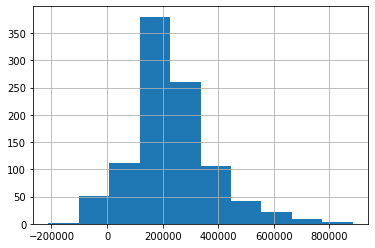

In [14]:
sac['price'].hist()

In [17]:
(sac.price > 100).sum()

984

In [18]:
len(sac)

985

In [21]:
(sac['sq__ft'] > 0).sum()

813

In [22]:
data = sac[(sac.price > 100) & (sac['sq__ft'] > 0)]

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

In [24]:
# A
data.corrwith(data.price)

zip         -0.219531
beds         0.443391
baths        0.502191
sq__ft       0.693902
price        1.000000
latitude     0.058632
longitude    0.278304
dtype: float64

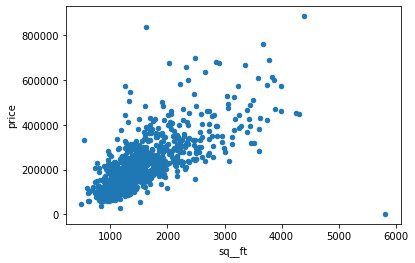

In [25]:
data.plot(x='sq__ft', y='price', kind='scatter')

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [5]:
# A:

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [26]:
# A:
X = data[['sq__ft']]
y = data['price']

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 6. Interpret the intercept. Interpret the slope.

In [27]:
# A:
linreg.coef_

array([125.31418258])

In [28]:
linreg.intercept_

29984.361726519768

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [8]:
# A:

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [30]:
# A:
predictions = linreg.predict(X)
residuals = (y - predictions) ** 2

In [33]:
residuals.mean()

7444498109.291218